In [8]:
import pandas as pd
import os

parent_root = os.path.dirname(os.getcwd())

heart_raw = pd.read_csv(f'{parent_root}/Data/heart.csv')

In [10]:
heart_raw.describe()

# Found: Cholesterol and RestingBP are 0, are patient dead or data entry err?

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
heart_raw[heart_raw['Cholesterol']<=0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


# Impute missing values on col: Cholesterol

In [34]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean',missing_values=0)
imputer = imputer.fit_transform(heart_raw['Cholesterol'].values.reshape(-1,1))

cholesterol_processed = pd.DataFrame(imputer, columns = ['Cholesterol'])

imputer = SimpleImputer(strategy='mean',missing_values=0)
imputer = imputer.fit_transform(heart_raw['RestingBP'].values.reshape(-1,1))

restingBP_processed = pd.DataFrame(imputer, columns = ['RestingBP'])

In [118]:
heart_processed = heart_raw.assign(**{'Cholesterol': cholesterol_processed,'RestingBP': restingBP_processed}) 

In [62]:
heart_processed.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Visualizations (pre-modeling)

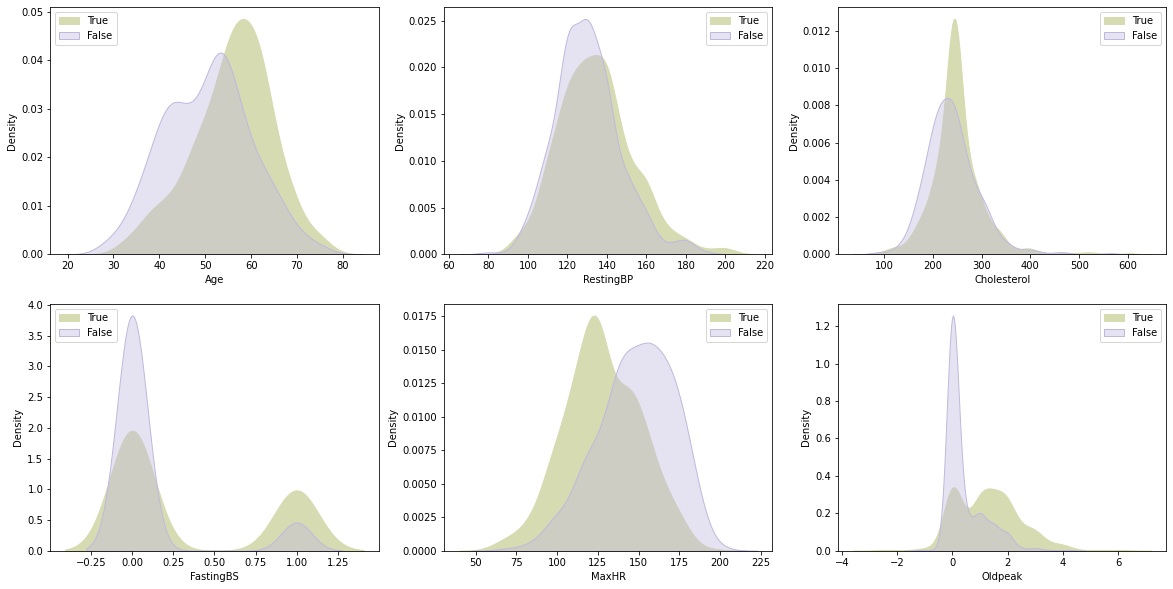

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax =plt.subplots(ncols = 3, nrows=2 , figsize=(20,10),facecolor='white')

sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='Age',ax=ax[0,0],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='Age',ax=ax[0,0],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)

sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='RestingBP',ax=ax[0,1],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='RestingBP',ax=ax[0,1],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)

sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='Cholesterol',ax=ax[0,2],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='Cholesterol',ax=ax[0,2],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)


sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='FastingBS',ax=ax[1,0],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='FastingBS',ax=ax[1,0],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)

sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='MaxHR',ax=ax[1,1],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='MaxHR',ax=ax[1,1],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)

sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==1] \
            ,x='Oldpeak',ax=ax[1,2],shade=True,color='#D6DBB2',alpha=1, label = 'True',legend=True)
sns.kdeplot(data=heart_processed[heart_processed['HeartDisease']==0] \
            ,x='Oldpeak',ax=ax[1,2],shade=True,color='#C0B9DD',alpha=0.4, label = 'False',legend=True)


ax[0,0].legend(loc=2)
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend(loc=2)
ax[1,1].legend()
ax[1,2].legend()

plt.show()

In [83]:
heart_processed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


### Correlation Matrix

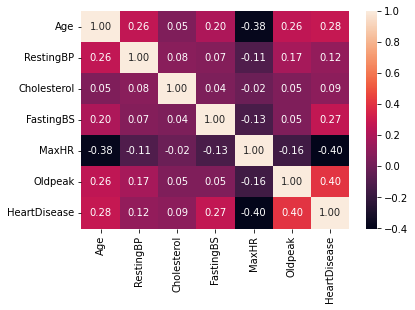

In [120]:
sns.heatmap(heart_processed.corr(), annot=True, fmt='.2f')

## drop cholesterol

# heart_processed.drop(['Cholesterol','RestingBP'],axis=1,inplace=True)

# Constructing ML Model

In [121]:
X = pd.get_dummies(heart_processed.drop('HeartDisease',axis=1))
y = heart_processed['HeartDisease']

In [122]:
print(f"Num of heart disease data: {heart_processed[heart_processed['HeartDisease']==1].count()[0]}")
print(f"Num of non-heart disease data: {heart_processed[heart_processed['HeartDisease']==0].count()[0]}")

# balancing dataset - improves accuracy & precision

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)

Num of heart disease data: 508
Num of non-heart disease data: 410


In [123]:
import sklearn.model_selection
# split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sm, y_sm , test_size=0.25,train_size=0.75,random_state=0)

In [124]:
from sklearn import linear_model

reg = sklearn.linear_model.LogisticRegressionCV(random_state = 0,max_iter=10000)
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(y_test,y_predicted)
print(f'Confusion Matrix:\n\n {c_m}\n')
TP = c_m[0,0]
FP = c_m[0,1]
FN = c_m[1,0]
TN = c_m[1,1]
print(f'Accuracy: {(TP + TN) / (TP + TN + FP + FN)}')
print(f'Precision: {TP / (TP + FP)}')
print(f'Misclassification: {(FP + FN) / (TP + TN + FP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'Sensitivity: {TP / (TP + FN)}')

Confusion Matrix:

 [[104  22]
 [ 11 117]]

Accuracy: 0.8700787401574803
Precision: 0.8253968253968254
Misclassification: 0.12992125984251968
Specificity: 0.841726618705036
Sensitivity: 0.9043478260869565


In [126]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test,y_predicted)

0.7427595207344688